<div style = 'text-align: center;'>
    <img src = '../images/ga_logo_large.png'>
</div>

# **Project 2: Ames Price Prediction Model**

---
### **Exploratory Data Analysis & Visualizations**

In [151]:
# import needed libraries for this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
# read in clean file from previous notebook

file_path = '../datasets/clean_data/ames_clean.csv'
ames = pd.read_csv(file_path)

#check size
ames.shape

(2051, 81)

In [155]:
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,69.06,13517,Pave,No_Alley,IR1,Lvl,...,0.0,0.0,Np,NoFe,NoFea,0.0,3,2010,WD,130500.0
1,544,531379050,60,RL,43.00,11492,Pave,No_Alley,IR1,Lvl,...,0.0,0.0,Np,NoFe,NoFea,0.0,4,2009,WD,220000.0
2,153,535304180,20,RL,68.00,7922,Pave,No_Alley,Reg,Lvl,...,0.0,0.0,Np,NoFe,NoFea,0.0,1,2010,WD,109000.0
3,318,916386060,60,RL,73.00,9802,Pave,No_Alley,Reg,Lvl,...,0.0,0.0,Np,NoFe,NoFea,0.0,4,2010,WD,174000.0
4,255,906425045,50,RL,82.00,14235,Pave,No_Alley,IR1,Lvl,...,0.0,0.0,Np,NoFe,NoFea,0.0,3,2010,WD,138500.0


This dataset is clean and all columns are cast to correct data type.  Dive right into EDA and visualization.

---
### **Functions**
Non-native functions applicable to this notebook are listed in this section.

**Plot histogram and boxplot for a column**

In [239]:
def plot_hist_box(col_name, title = '', xlabel = ''):
    '''
    This function plots a histogram and a boxplot of a column.
    
    Parameters:
    col_name: string, this is the column's name
    title: string, the plot title.  Default value is a blank string.
    xlabel: string, the x-axis label.  Default value is a blank string.
    
    Return:
    It returns two plots.  A histogram on the left and a boxplot on the right.
    '''

    plt.figure(figsize = (16, 6))

    plot1 = plt.subplot(1, 2, 1)  # for histogram
    plot2 = plt.subplot(1, 2, 2)  # for box plot

    # histogram ---------------------------------------------------------------------------------------------
    plot1.hist(ames[col_name], bins = 25, color = '#003366', edgecolor = '#ffffff');
    plot1.set_title(title, fontweight = 'bold', color = '#6e6e6e', fontsize = 14)
    plot1.set_xlabel(xlabel, color = '#6e6e6e', fontsize = 14)
    plot1.spines['top'].set_visible(False)
    plot1.spines['right'].set_visible(False)
    plot1.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 12);
    
    
    # box plot -----------------------------------------------------------------------------------------------
    sns.boxplot(data = ames[col_name], ax = plot2, orient = 'h', color = '#003366', medianprops = {'color':'#FFFFFF'});
    plot2.set_title(title, fontweight = 'bold', color = '#6e6e6e', fontsize = 14);
    plot2.spines['top'].set_visible(False)
    plot2.spines['left'].set_visible(False)
    plot2.spines['right'].set_visible(False)
    plot2.set_xlabel(xlabel, color = '#6e6e6e', fontsize = 14)
    plot2.tick_params(axis = 'x', which = 'both', colors = '#6e6e6e', labelsize = 12);

**Plot heatmap for given number of columns**

In [163]:
def plot_heatmap(columns):
    '''
    This function plots a heatmap of the number of columns passed in.
    
    Parameters:
    columns: list, a list of columns to plot.
    
    Return:
    It returns a heatmap of the columns.
    '''

    plt.figure(figsize = (6, 6))

    # heatmap setup
    corrs = round(ames[columns].corr(), 2)
    mask = np.zeros_like(corrs)
    mask[np.triu_indices_from(mask)] = True

    # plot heatmap
    sns.heatmap(corrs,
                square = True,
                annot = True,
                cmap = 'bone',
                mask = mask,
                vmin = -1,
                vmax = 1);

---
### **Predictive Model 1**
Per problem statement on previous notebook, this analysis aims to build a predicitve pricing model for home sales in Ames, IA.  The first model will be a MLR model based on numeric columns, namely `lot_area`, `1st_flr_sf` and `2nd_flr_sf`.  The target column will be `saleprice`.<br>

---
Start with pairplot of these four columns.

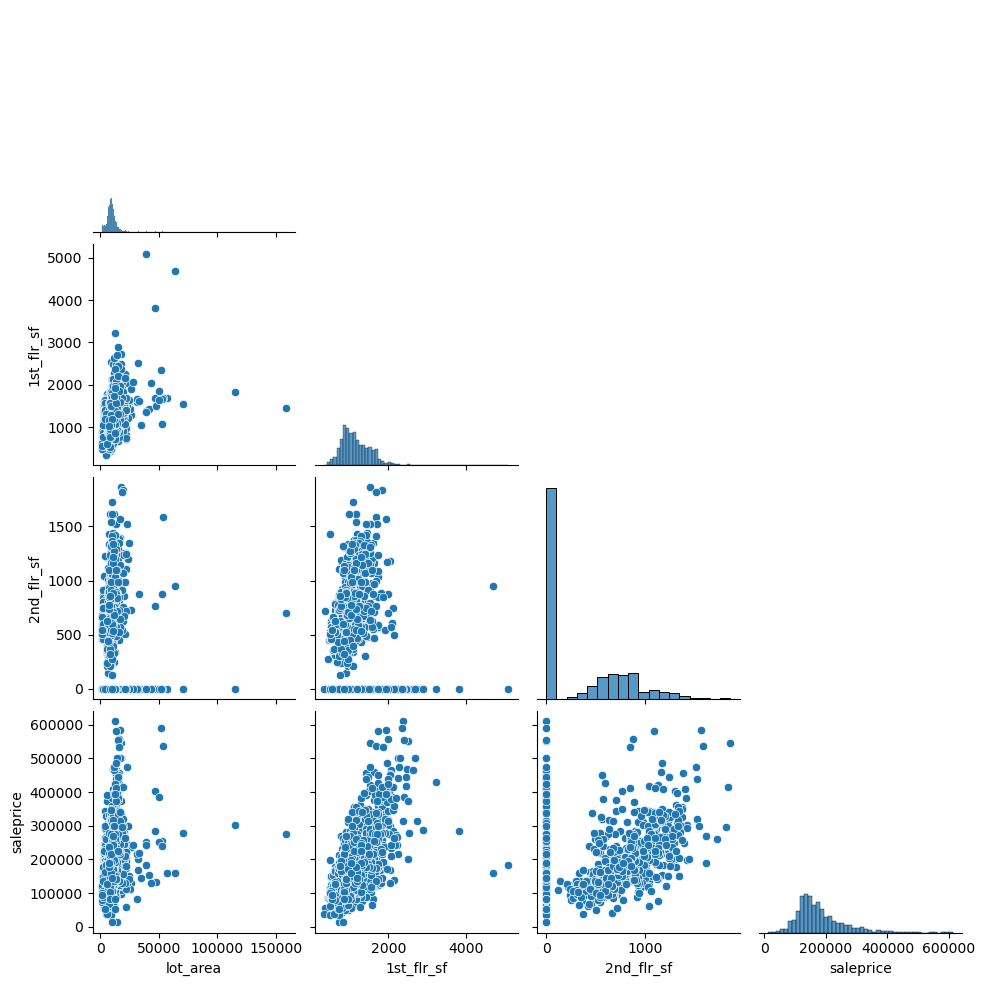

In [165]:
sns.pairplot(data = ames[['lot_area', '1st_flr_sf', '2nd_flr_sf', 'saleprice']], corner = True);

There seems to be a very strong correlation between `salesprice` and `2nd_flr_sf`, followed by `1st_flr_sf`.  Not much correlation is observed against `lot_area`. Next, check the heatmaps between these four columns.

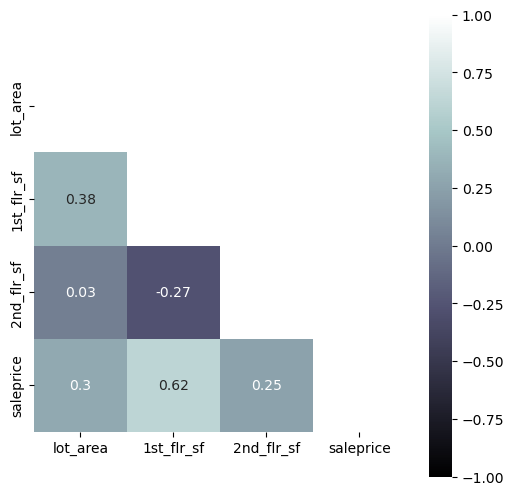

In [168]:
columns = ['lot_area', '1st_flr_sf', '2nd_flr_sf', 'saleprice']

plot_heatmap(columns)
plt.savefig('../images/model_1_heatmap.png')

Actually, the correlation order against `saleprice`, from strongest to weakest, is `1st_flr_sf`, `lot_area` and `2nd_flr_sf`.<br>
Check individual histograms and boxplots to review normality of these columns.

---
Column: `saleprice`

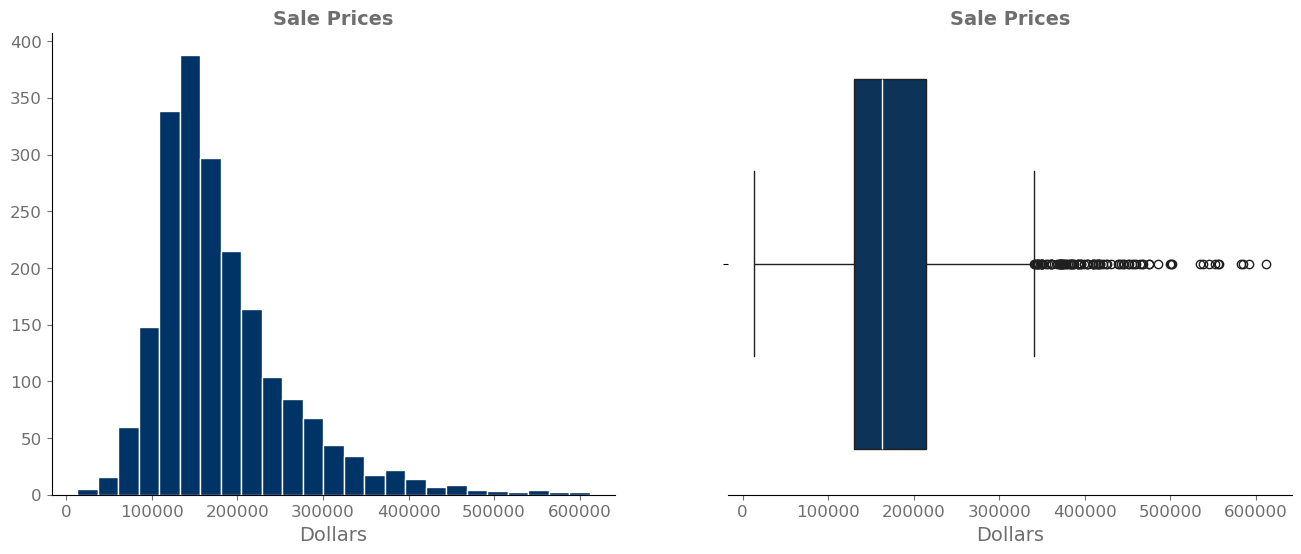

In [241]:
plot_hist_box('saleprice', 'Sale Prices', 'Dollars')
plt.savefig('../images/model_1_hist_and_boxplot_sale_prices.png')

Inside the interquartile range (IQR) `saleprice` seems to follow a normal distribution.  There are lots of outliers above the 75th quartile. Take a look at the summary statistics for further insight.

In [175]:
ames['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

The jump from the 75th percentile to the max is huge.  Explore the rows within this range to see what stands out.

In [178]:
# select rows where price is greater than 214K
# first for columns 'lot_area', '1st_flr_sf', '2nd_flr_sf'

cols = ['lot_area', '1st_flr_sf', '2nd_flr_sf']
ames[ames['saleprice'] > 214000][cols].describe()

,lot_area,1st_flr_sf,2nd_flr_sf
count,509.000000,509.000000,509.000000
mean,13192.952849,1509.220039,486.842829
std,10506.597964,397.643421,545.664407
min,2938.000000,764.000000,0.000000
25%,9675.000000,1209.000000,0.000000
50%,11645.000000,1520.000000,0.000000
75%,14000.000000,1712.000000,983.000000
max,159000.000000,3820.000000,1862.000000


The lot sizes and living square footage (1st and 2nd floor) don't show a pattern.  These high priced homes come in different sizes (lot and house size).  Next, check if `neighborhood` is a driver of these outliers.

In [181]:
# select rows where price is greater than 214K, neighborhood column

ames[ames['saleprice'] > 214000]['neighborhood'].value_counts()

neighborhood
NridgHt    103
Somerst     72
CollgCr     62
NoRidge     47
Crawfor     30
StoneBr     28
SawyerW     26
Timber      26
NWAmes      22
Gilbert     19
ClearCr     14
Veenker     12
Mitchel     11
Edwards     10
NAmes       10
Blmngtn      7
OldTown      5
BrkSide      2
GrnHill      2
Sawyer       1
Name: count, dtype: int64

Per outside <a href = 'https://bestneighborhood.org/best-neighborhoods-ames-ia/'>sources</a>, Northridge Heights and Somerset are among the top neighborhoods in Ames, IA.  These two neighborhoods rank at the top the count above.  Check basic stats for home sales in these neighborhoods, specifically related to sales over 214K.

In [184]:
# summary stats for this subset

# grab neighborhood names first
neighborhoods = ames[ames['saleprice'] > 214000]['neighborhood'].value_counts().index.tolist()

# create small df for homes sold over 214K, just neighborhood and sale price
df = ames[ames['saleprice'] > 214000][['neighborhood', 'saleprice']]

# collect and store stats in dictionary
# fill in with key as neighborhood, values as min, mean, median, max
stats_dictionary = {}

# loop thru neighborhoods and build dictionary
for hood in neighborhoods:
    data = df[df['neighborhood'] == hood]['saleprice']
    min_price = data.min()
    mean_price = data.mean()
    median_price = data.median()
    max_price = data.max()
    stats_dictionary[hood] = [min_price, mean_price, median_price, max_price]
    
# create df from dictionary
sales_over214K = pd.DataFrame(stats_dictionary)

# display new df
print(sales_over214K.shape)
sales_over214K

(4, 20)


,NridgHt,Somerst,CollgCr,NoRidge,Crawfor,StoneBr,SawyerW,Timber,NWAmes,Gilbert,ClearCr,Veenker,Mitchel,Edwards,NAmes,Blmngtn,OldTown,BrkSide,GrnHill,Sawyer
0,220000.00000,215000.000000,215700.000000,221000.000000,215000.000000,236500.000000,215000.000000,214900.000000,215000.000000,215000.000000,225000.000000,217500.0,215000.000000,216000.0,215000.0,215000.000000,220000.0,214500.0,230000.0,219000.0
1,346918.68932,265558.027778,255980.532258,318981.234043,261751.333333,381934.928571,250866.269231,291049.384615,249622.727273,245524.210526,260921.428571,286475.0,247990.909091,275670.0,255000.0,233148.714286,314200.0,219000.0,280000.0,219000.0
2,332200.00000,255000.000000,237000.000000,301500.000000,242500.000000,359151.000000,242250.000000,280556.500000,246750.000000,230500.000000,250500.000000,277350.0,242500.000000,258985.0,248000.0,226500.000000,295000.0,219000.0,280000.0,219000.0
3,611657.00000,468000.000000,475000.000000,584500.000000,392500.000000,591587.000000,320000.000000,425000.000000,306000.000000,377500.000000,328000.000000,385000.0,300000.000000,415000.0,345000.0,264561.000000,475000.0,223500.0,330000.0,219000.0


This dataframe is a summary of key statistics, by neighborhood, for all home sales above the 75th percentile.  These are the outliers visible in the box plot from several cells back.<br>
Next, sort by max value in ascending order and plot as lines to better see the pattern.

In [187]:
# sort by max value, row index 3, gather neighborhood names as new ordered columns

ordered_cols = sales_over214K.iloc[3].sort_values(ascending = True).index.tolist()
sales_over214K = sales_over214K[ordered_cols]
sales_over214K.head()

,Sawyer,BrkSide,Blmngtn,Mitchel,NWAmes,SawyerW,ClearCr,GrnHill,NAmes,Gilbert,Veenker,Crawfor,Edwards,Timber,Somerst,CollgCr,OldTown,NoRidge,StoneBr,NridgHt
0,219000.0,214500.0,215000.000000,215000.000000,215000.000000,215000.000000,225000.000000,230000.0,215000.0,215000.000000,217500.0,215000.000000,216000.0,214900.000000,215000.000000,215700.000000,220000.0,221000.000000,236500.000000,220000.00000
1,219000.0,219000.0,233148.714286,247990.909091,249622.727273,250866.269231,260921.428571,280000.0,255000.0,245524.210526,286475.0,261751.333333,275670.0,291049.384615,265558.027778,255980.532258,314200.0,318981.234043,381934.928571,346918.68932
2,219000.0,219000.0,226500.000000,242500.000000,246750.000000,242250.000000,250500.000000,280000.0,248000.0,230500.000000,277350.0,242500.000000,258985.0,280556.500000,255000.000000,237000.000000,295000.0,301500.000000,359151.000000,332200.00000
3,219000.0,223500.0,264561.000000,300000.000000,306000.000000,320000.000000,328000.000000,330000.0,345000.0,377500.000000,385000.0,392500.000000,415000.0,425000.000000,468000.000000,475000.000000,475000.0,584500.000000,591587.000000,611657.00000


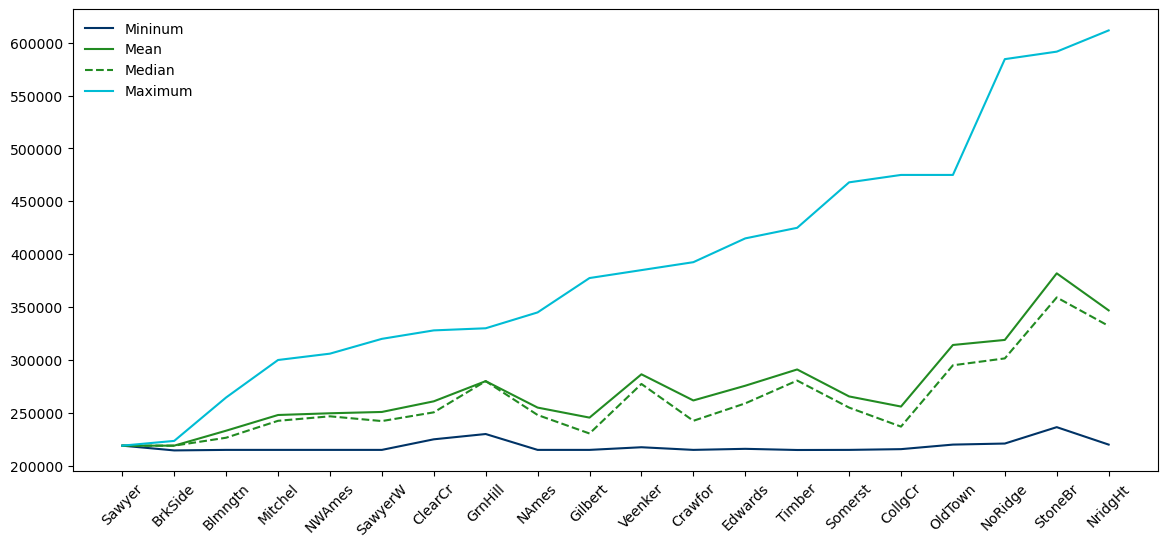

In [189]:
# plot stats

plt.figure(figsize = (14, 6))
plot3 = plt.subplot(1, 1, 1)

plot3.plot(ordered_cols, sales_over214K.loc[0], label = 'Mininum', color = '#003366');
plot3.plot(ordered_cols, sales_over214K.loc[1], label = 'Mean', color = '#228b22');
plot3.plot(ordered_cols, sales_over214K.loc[2], label = 'Median', color = '#228b22', linestyle = '--');
plot3.plot(ordered_cols, sales_over214K.loc[3], label = 'Maximum', color = '#00bcd4')

plot3.legend()
plot3.legend(frameon = False)

plt.xticks(rotation = 45);
plt.savefig('../images/sales_over_214K_by_neighborhood.png')

The best neighborhoods are driving the outliers because the maximum sale price keeps increasing substantially. `Neighborhood` might be considered a feature for future predictive model iterations.

---
Column: `1st_flr_sf`

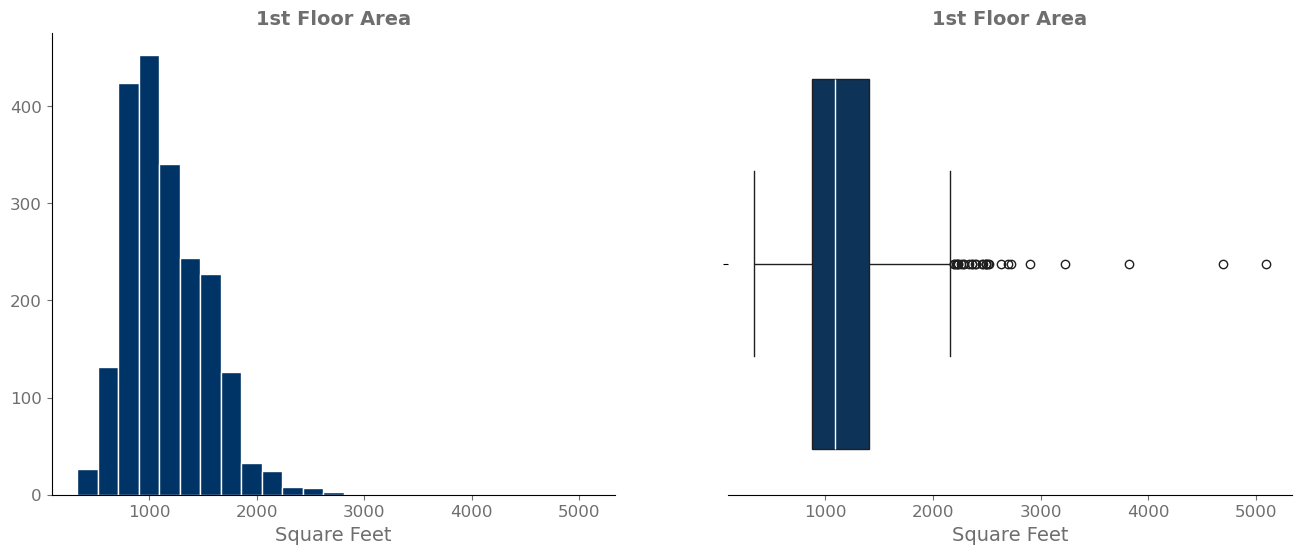

In [191]:
# build hist and box plot for '1st_flr_sf'
plot_hist_box('1st_flr_sf', '1st Floor Area', 'Square Feet')
plt.savefig('../images/model_1_hist_and_boxplot_1st_flr_area.png')

The normality pattern or lack thereof is similar to that of the `saleprice` column, there are lots of outliers above the 75th percentile.  Check the summary statistics for this column.

In [193]:
ames['1st_flr_sf'].describe()

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st_flr_sf, dtype: float64

There is also a big jump in square footage from the 75th percentile to the max value.  It's probably correlated to the neighborhoods that were previously explored.  Bigger homes in top notch neighborhoods will command higher sale prices.  Future iterations of the predictive model may come back to this observation.

---
Column: `lot_area`

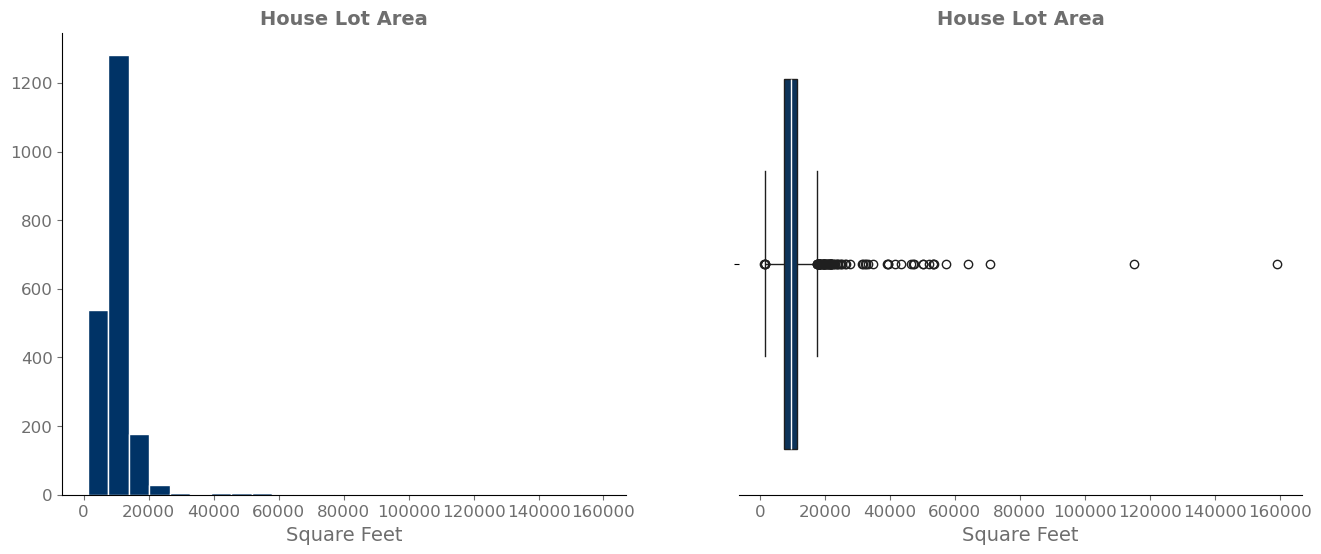

In [195]:
# build hist and box plot for 'lot_area'
plot_hist_box('lot_area', 'House Lot Area', 'Square Feet')
plt.savefig('../images/model_1_hist_and_boxplot_lot_area.png')

In [39]:
ames['lot_area'].describe()

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: lot_area, dtype: float64

The outliers on this column are even farther out.  There is a lot of uniformity around the mean and the median, but past the 75th percentile the data is very skewed with some very large lots.  This may also be correlated with certain neighborhoods. Come back to this feature for model refining.

---
Column: `2nd_flr_sf`

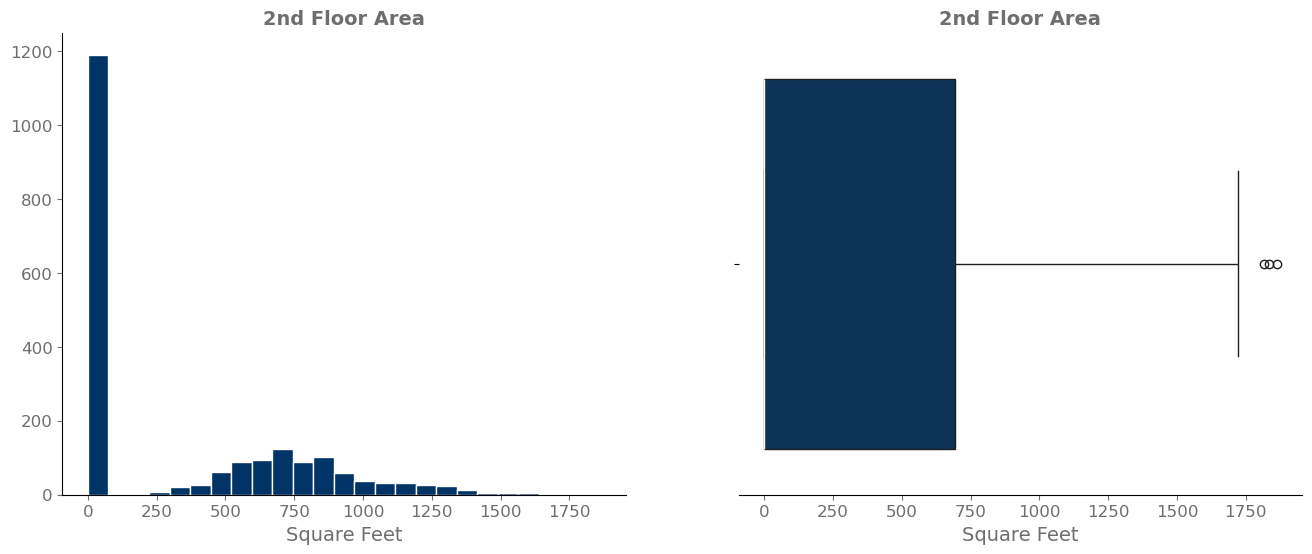

In [197]:
# build hist and box plot for '2nd_flr_sf'
plot_hist_box('2nd_flr_sf', '2nd Floor Area', 'Square Feet')

In [43]:
ames['2nd_flr_sf'].describe()

count    2051.000000
mean      329.329108
std       425.671046
min         0.000000
25%         0.000000
50%         0.000000
75%       692.500000
max      1862.000000
Name: 2nd_flr_sf, dtype: float64

The charts and the stats seem to indicate that most homes in Ames, IA don't have a second floor. Plot again for values above zero.

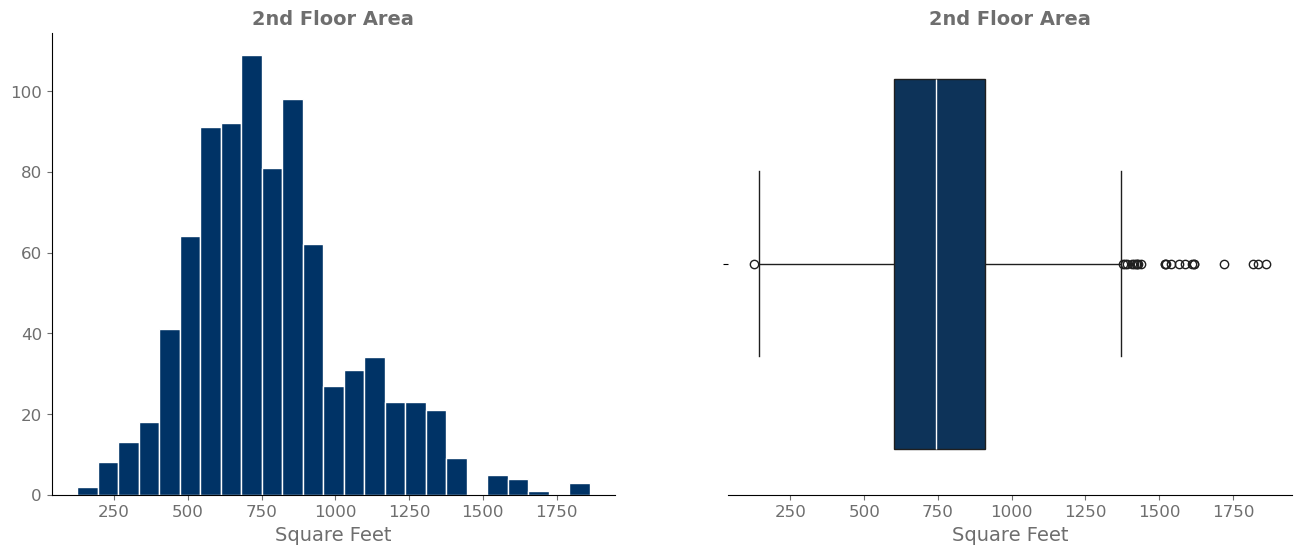

In [199]:
plt.figure(figsize = (16, 6))

plot1 = plt.subplot(1, 2, 1)  # for histogram
plot2 = plt.subplot(1, 2, 2)  # for box plot

# histogram ---------------------------------------------------------------------------------------------
plot1.hist(ames[ames['2nd_flr_sf'] > 0]['2nd_flr_sf'], bins = 25, color = '#003366', edgecolor = '#ffffff');
plot1.set_title('2nd Floor Area', fontweight = 'bold', color = '#6e6e6e', fontsize = 14)
plot1.set_xlabel('Square Feet', color = '#6e6e6e', fontsize = 14)
plot1.spines['top'].set_visible(False)
plot1.spines['right'].set_visible(False)
plot1.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 12);

# box plot -----------------------------------------------------------------------------------------------
sns.boxplot(data = ames[ames['2nd_flr_sf'] > 0]['2nd_flr_sf'], ax = plot2, orient = 'h', color = '#003366', medianprops = {'color':'#FFFFFF'});
plot2.set_title('2nd Floor Area', fontweight = 'bold', color = '#6e6e6e', fontsize = 14);
plot2.spines['top'].set_visible(False)
plot2.spines['left'].set_visible(False)
plot2.spines['right'].set_visible(False)
plot2.set_xlabel('Square Feet', color = '#6e6e6e', fontsize = 14)
plot2.tick_params(axis = 'x', which = 'both', colors = '#6e6e6e', labelsize = 12);

plt.savefig('../images/model_1_hist_and_boxplot_2nd_flr_area.png')

For homes with a second floor, the data has a distribution that more closely approximates normality.<br>
Finally, check the desired predictive columns against the target by using scatter plots.  This is to get a third look at these columns from a different perspective.

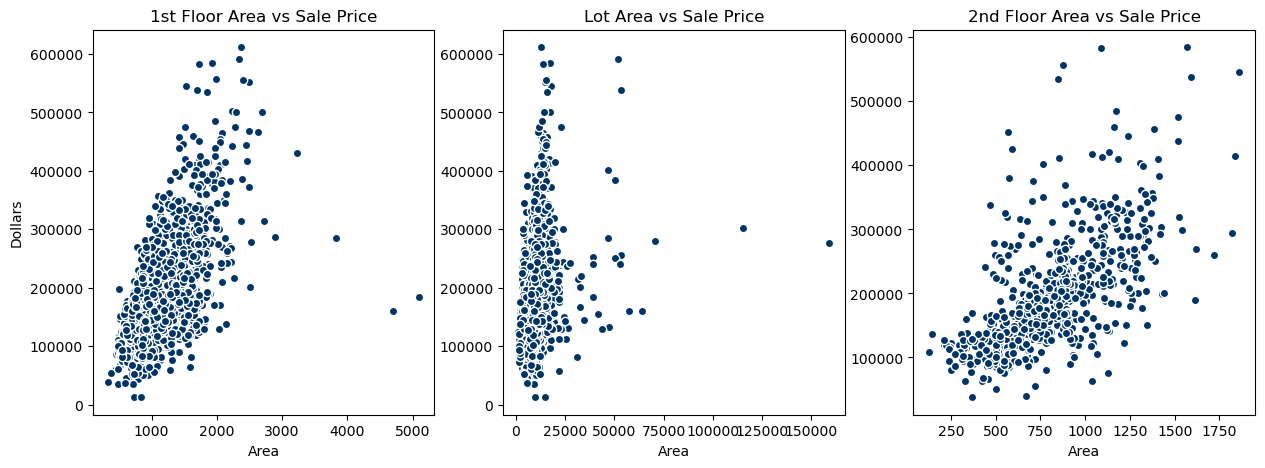

In [201]:
# set up container

plt.figure(figsize = (15, 5))

plot3 = plt.subplot(1, 3, 1)
plot4 = plt.subplot(1, 3, 2)
plot5 = plt.subplot(1, 3, 3)

plot3.scatter(ames['1st_flr_sf'], ames['saleprice'], color = '#003366', edgecolor = '#ffffff')
plot3.set_title('1st Floor Area vs Sale Price')
plot3.set_xlabel('Area')
plot3.set_ylabel('Dollars')

plot4.scatter(ames['lot_area'], ames['saleprice'], color = '#003366', edgecolor = '#ffffff')
plot4.set_title('Lot Area vs Sale Price')
plot4.set_xlabel('Area')

plot5.scatter(ames[ames['2nd_flr_sf'] > 0]['2nd_flr_sf'], ames[ames['2nd_flr_sf'] > 0]['saleprice'], color = '#003366', edgecolor = '#ffffff');
plot5.set_title('2nd Floor Area vs Sale Price')
plot5.set_xlabel('Area')

plt.savefig('../images/model_1_scatter_plots.png')

Based on the analysis and plots, these columns make for good candidates to build a simple multiple linear regression predictive model.  It is important to note that the right-most plot is only based on rows where the existing home has a second floor.  The predictive model will actually take all rows into account.

---
### **Predictive Model 2**
Using the first model as baseline, it's time to improve on it.  The second model still aims to rely on features that measure area. Again, based on the premise that home buyers value space, both indoors and outdoors.<br>
Upon further analysis of the various area features, in order to account for their totality, columns will be added and the result assigned to new columns.  Basically, the model will take into account total outdoor area, total indoor area and garage area.  Garage area is viewed separately because it could either be inside or outside the house (i.e. detached garages).<br><br>
Column `outdoor_area` will consist of the sum of the following columns: `lot_area`, `wood_deck_sf`, `open_porch_sf`, `enclosed_porch`, `3ssn_porch`, `screen_porch` and `pool_area`.<br><br>
Column `indoor_area` will consist of the sum of the following columns: `total_bsmt_sf` and `gr_liv_area`.<br><br>
The `garage_area` column will stand alone.

---
**Create New Columns**

In [204]:
# indoor area
ames['indoor_area'] = ames['total_bsmt_sf'] + ames['gr_liv_area']

In [206]:
# outdoor area
cols = ['lot_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area']
ames['outdoor_area'] = ames[cols].sum(axis = 1) #  < had to reseach this one with chatgpt, adding them manually was cumbersome

In [208]:
# check new shape and columns
print(ames.shape)
ames[['indoor_area', 'outdoor_area']].head()

(2051, 83)


,indoor_area,outdoor_area
0,2204.0,13561.0
1,3035.0,11566.0
2,2114.0,7974.0
3,1828.0,9902.0
4,2121.0,14294.0


The new calculated columns have been successfully appended to the DF. Next, create a heatmap to see correlations between `saleprice`, `garage_area` and the two new columns.

---

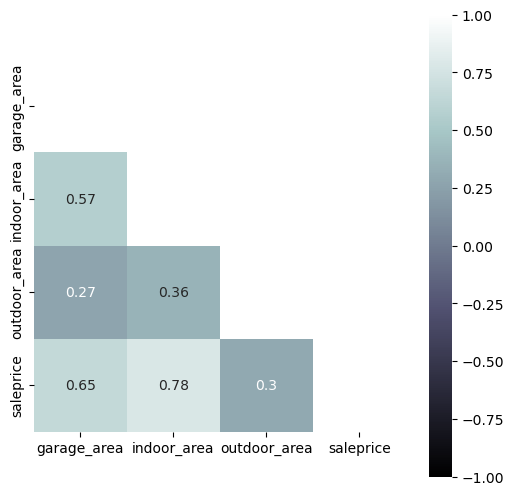

In [212]:
columns = ['garage_area', 'indoor_area', 'outdoor_area', 'saleprice']

plot_heatmap(columns)
plt.savefig('../images/model_2_heatmap.png')

The heatmap results are striking. There's a strong correlation between `saleprice` and `indoor_area`, followed by `garage_area`.  The final sale price is still positively correlated to `outdoor_area`, but it's weak.<br>
Next, visualize these three correlations with scatter plots.

-----------

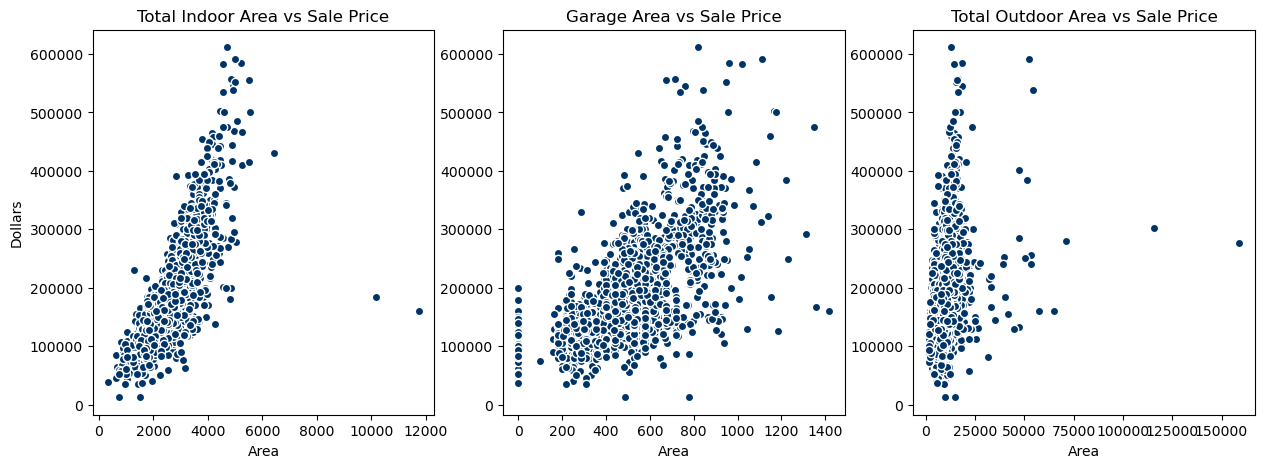

In [218]:
# set up container

plt.figure(figsize = (15, 5))

plot3 = plt.subplot(1, 3, 1)
plot4 = plt.subplot(1, 3, 2)
plot5 = plt.subplot(1, 3, 3)

plot3.scatter(ames['indoor_area'], ames['saleprice'], color = '#003366', edgecolor = '#ffffff')
plot3.set_title('Total Indoor Area vs Sale Price')
plot3.set_xlabel('Area')
plot3.set_ylabel('Dollars')

plot4.scatter(ames['garage_area'], ames['saleprice'], color = '#003366', edgecolor = '#ffffff')
plot4.set_title('Garage Area vs Sale Price')
plot4.set_xlabel('Area')

plot5.scatter(ames['outdoor_area'], ames['saleprice'], color = '#003366', edgecolor = '#ffffff');
plot5.set_title('Total Outdoor Area vs Sale Price')
plot5.set_xlabel('Area')

plt.savefig('../images/model_2_scatter_plots.png');

These pictures definitely speak louder than words.  Next, check their distributions to gauge normality.

-----
Histograms

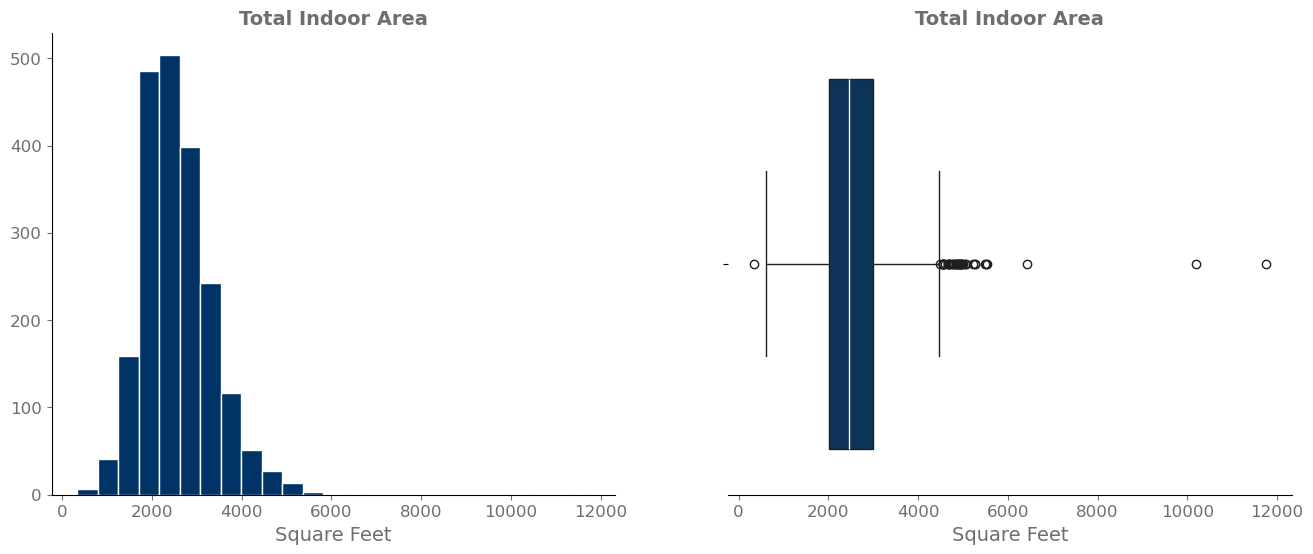

In [243]:
# build hist and box plot for 'indoor_area'
plot_hist_box('indoor_area', 'Total Indoor Area', 'Square Feet')
plt.savefig('../images/model_2_hist_and_boxplot_indoor.png')

Both the histogram and the boxplot show a decent looking normal distribution around the mean.  There are, of course, several outliers beyond the 75th percentile.

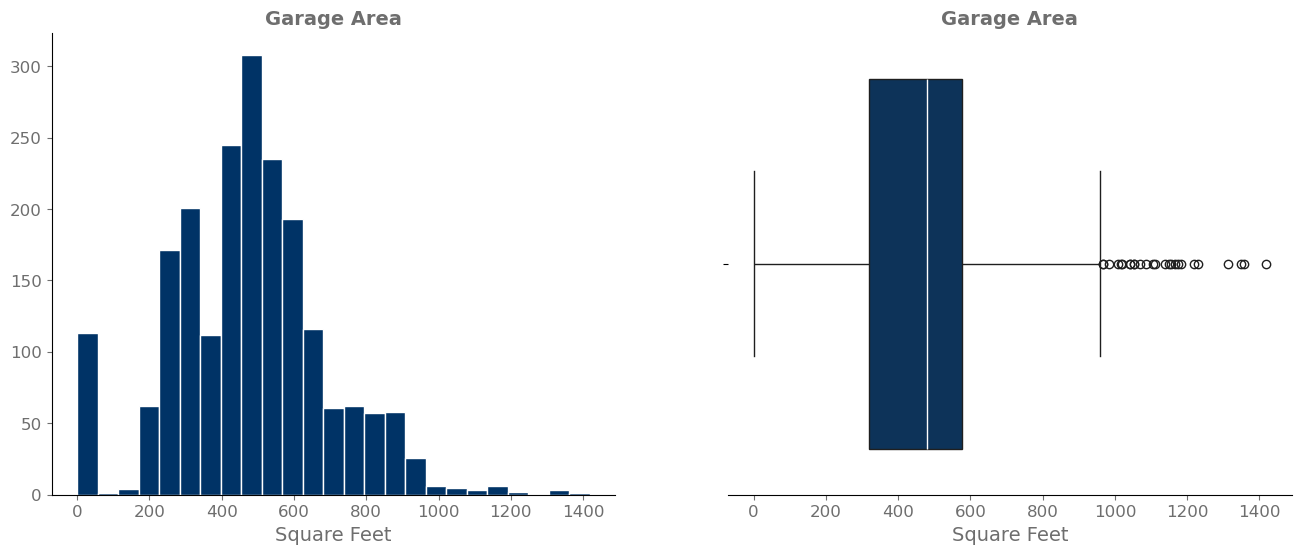

In [64]:
# build hist and box plot for 'garage_area'
plot_hist_box('garage_area', 'Garage Area', 'Square Feet')
plt.savefig('../images/model_2_hist_and_boxplot_garage.png')

For this feature, the charts indicate that the model may be susceptible to more variability.

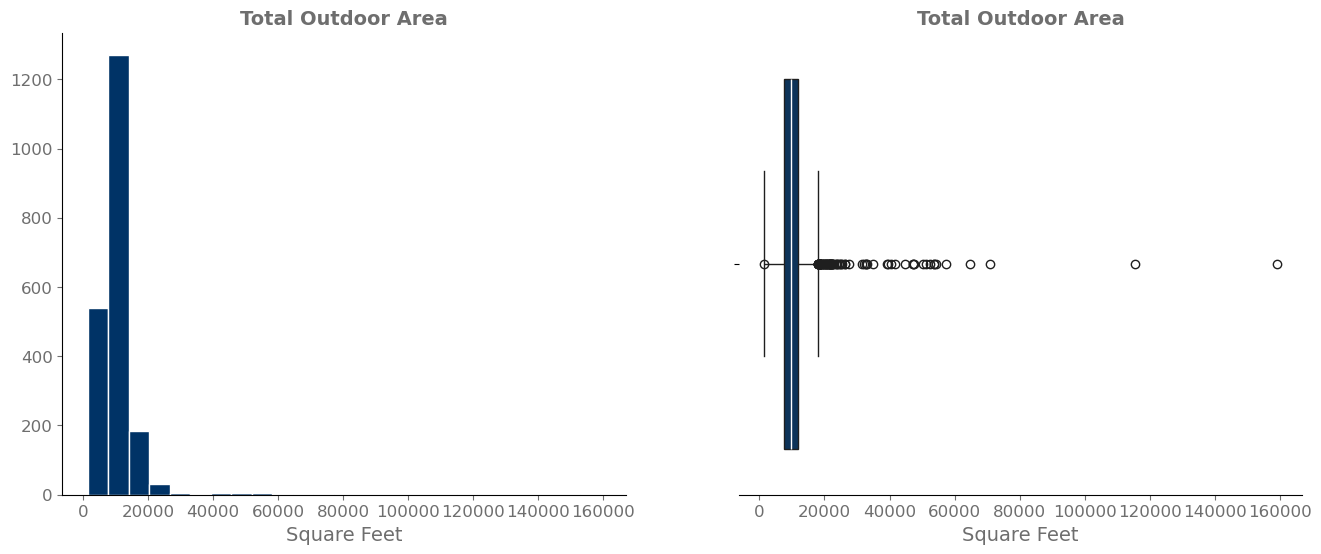

In [247]:
# build hist and box plot for 'outdoor_area'
plot_hist_box('outdoor_area', 'Total Outdoor Area', 'Square Feet')
plt.savefig('../images/model_2_hist_and_boxplot_outdoor.png')

This particular feature shows a very skewed distribution.  Perhaps it should be dropped from the model.

---
Since two extra columns were added to the dataframe, save a copy of this version to the `clean_data` folder.

In [251]:
# relative path
output_path = '../datasets/clean_data/ames_clean2.csv'

# save file
ames.to_csv(output_path, index = False)

In order to continue improving the model, let's take a look at the `year_built` column.  Newer homes tend to command stronger demand from buyers.  A quick look at a heatmap taking this variable into account should help visualize whether that assumption is valid.

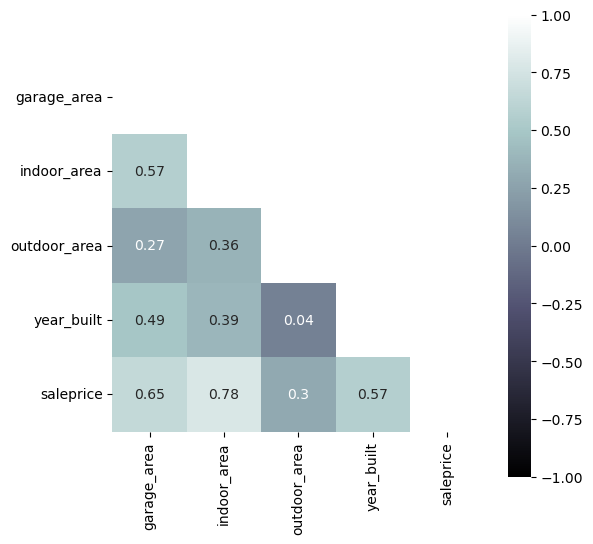

In [259]:
columns = ['garage_area', 'indoor_area', 'outdoor_area', 'year_built', 'saleprice']

plot_heatmap(columns)
plt.savefig('../images/model_2a_heatmap.png')

The correlation between `saleprice` and `year_built` is positive, although not as strong as it was expected.

It's time to look into interactive terms.  In order to stay with numerical features, let's take a look at creating an interaction between `overall_qual` and `overall_cond`.  Both of these features are integer ratings ranging from 1 to 10.  The interaction between the two should be explored by creating a new column.

In [268]:
# create new interactive col
ames['overall qual * cond'] = ames['overall_qual'] * ames['overall_cond']

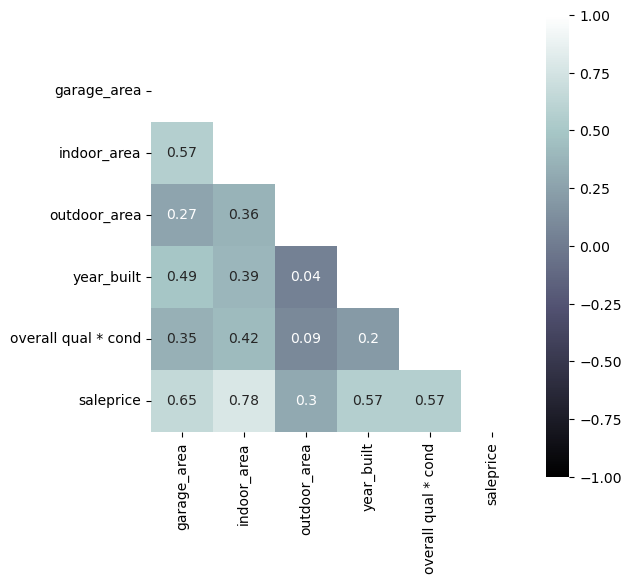

In [270]:
# check correlations between selected features
columns = ['garage_area', 'indoor_area', 'outdoor_area', 'year_built', 'overall qual * cond', 'saleprice']

plot_heatmap(columns)
#plt.savefig('../images/model_2_heatmap.png')

The new interactive column shows a positive correlation with `saleprice`.  Once again, not as strong as originally expected.  Given the fact that the heatmap shows correlations above 0.65 for `garage_area` and `indoor_area`, perhaps combining both columns might create a stronger relationship that more closely correlates to the target variable.  Add a new column to take this into account.

In [276]:
# add garage_area and indoor_area, combine into new col
ames['total_house_area'] = ames['garage_area'] + ames['indoor_area']

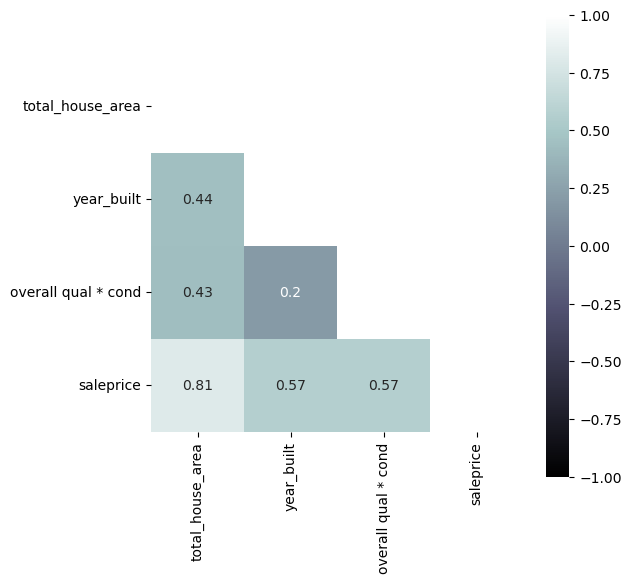

In [278]:
# new heatmap of selected columns
columns = ['total_house_area', 'year_built', 'overall qual * cond', 'saleprice']

plot_heatmap(columns)
#plt.savefig('../images/model_2_heatmap.png')

The new combined column shows a very strong correlation with the target vector.  This features arrangement should be tested in the model.

----
Based on how the model has bee steadily improved and its performance.  It's time to take a look at combining other variables, which will then be transformed using polynomial features, and scaled.<br>
Add all full bathrooms together into a new column, perform the same operation for half bathrooms as well.  Drop the previously created interactive column as the polynomial features will take care of that interaction.  Then take at look at the heatmap with correlations.

In [289]:
# combine full baths into one col
ames['full_baths'] = ames['bsmt_full_bath'] + ames['full_bath']

# combine 1/2 baths into one col
ames['half_baths'] = ames['bsmt_half_bath'] + ames['half_bath']

# drop 'overall qual * cond' col, poly feat taking care of it
ames.drop(columns = 'overall qual * cond', inplace = True)

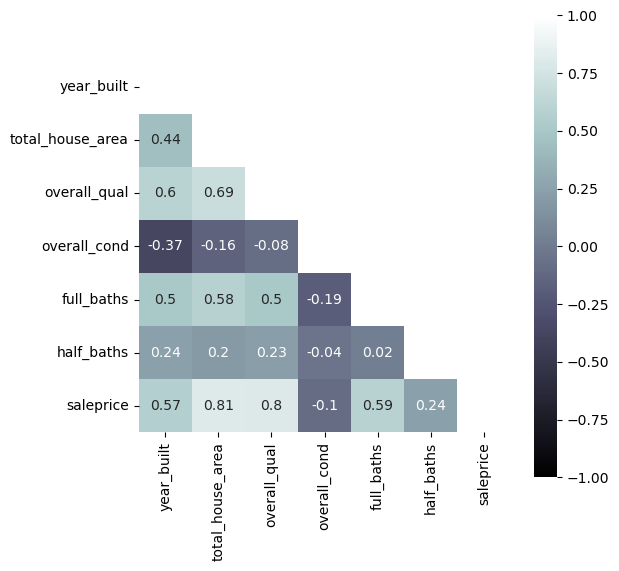

In [298]:
# new heatmap of selected columns
columns = ['year_built', 'total_house_area', 'overall_qual', 'overall_cond', 'full_baths', 'half_baths', 'saleprice']

plot_heatmap(columns)
#plt.savefig('../images/model_2_heatmap.png')

Overall quality and full bathrooms correlate well to sales price.  This should be modeled. First all selected features, then depending on performance remove overall condition and half bathrooms.